# 결정 트리 (Decision Tree)

```
$ brew install graphviz
$ pip install graphviz
```

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [5]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=11
)

## 모델 시각화

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [7]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, 
    out_file='tree.dot',
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    impurity=True,
    filled=True
)

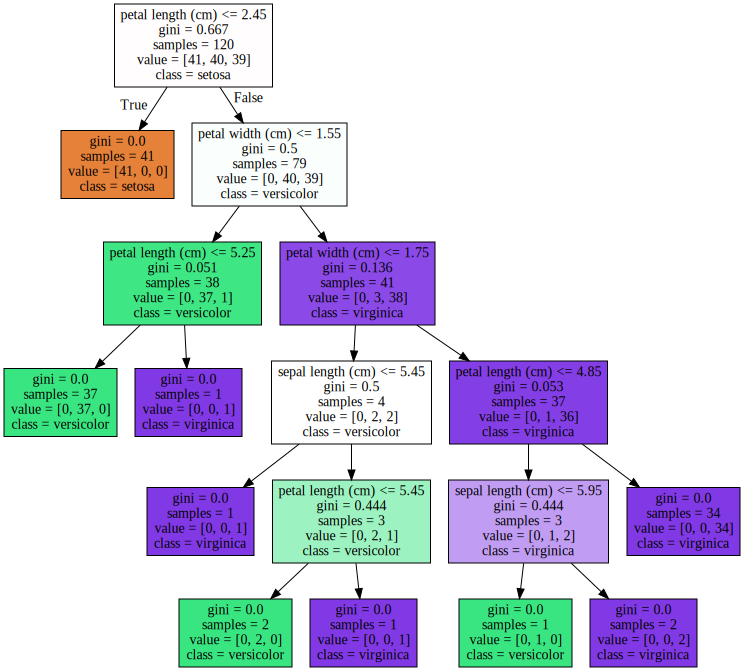

In [8]:
import graphviz

# 위에서 생성된 tree.dot 파일을 graphviz 읽어서 주피터 노트북에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [9]:
pred = dt_clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9333333333333333

## 제약 조건
- max_depth = 3

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

dt_clf2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_clf2.fit(X_train, y_train)
pred2 = dt_clf2.predict(X_test)
print('정확도: {}'.format(accuracy_score(y_test, pred2)))

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf2, 
    out_file='tree.dot',
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    impurity=True,
    filled=True
)

# 위에서 생성된 tree.dot 파일을 graphviz 읽어서 주피터 노트북에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

DecisionTreeClassifier(max_depth=3, random_state=156)

## 제약 조건
- min_samples_split = 4 인 경우

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

dt_clf3 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dt_clf3.fit(X_train, y_train)
pred3 = dt_clf3.predict(X_test)
print('정확도: {}'.format(accuracy_score(y_test, pred3)))

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf3, 
    out_file='tree.dot',
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    impurity=True,
    filled=True
)

# 위에서 생성된 tree.dot 파일을 graphviz 읽어서 주피터 노트북에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

## 제약조건
- min_samples_leaf = 4

정확도: 0.9333333333333333


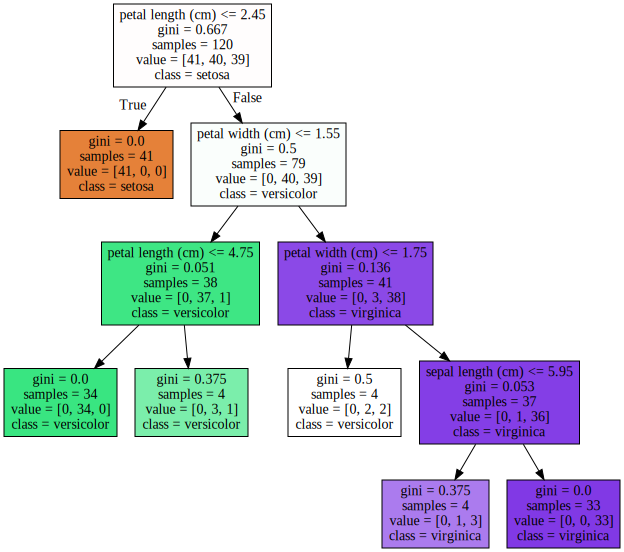

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

dt_clf4 = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dt_clf4.fit(X_train, y_train)
pred4 = dt_clf4.predict(X_test)
print('정확도: {}'.format(accuracy_score(y_test, pred4)))

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf4, 
    out_file='tree.dot',
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    impurity=True,
    filled=True
)

# 위에서 생성된 tree.dot 파일을 graphviz 읽어서 주피터 노트북에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Feature 중요도

In [27]:
print(dt_clf.feature_importances_)
print(dt_clf2.feature_importances_)
print(dt_clf3.feature_importances_)
print(dt_clf4.feature_importances_)

[0.02500521 0.         0.55490281 0.42009198]
[0.         0.         0.55810743 0.44189257]
[0.00862255 0.         0.55679642 0.43458103]
[0.00594727 0.         0.5459484  0.44810433]


In [28]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [30]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0}: {1:.4f}'.format(name, value))

sepal length (cm): 0.0250
sepal width (cm): 0.0000
petal length (cm): 0.5549
petal width (cm): 0.4201


<AxesSubplot:>

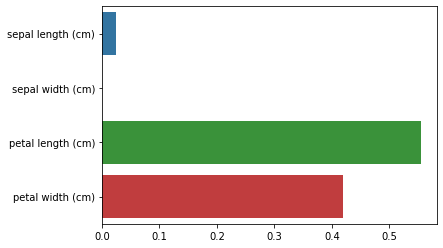

In [31]:
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

In [36]:
import pandas as pd
df = pd.DataFrame({
    'name': iris.feature_names,
    '제약조건 없음': dt_clf.feature_importances_,
    'max_depth=3': dt_clf2.feature_importances_,
    'min_samples_split=4': dt_clf3.feature_importances_,
    'min_samples_leaf=4': dt_clf4.feature_importances_,
})
df

,name,제약조건 없음,max_depth=3,min_samples_split=4,min_samples_leaf=4
0,sepal length (cm),0.025005,0.000000,0.008623,0.005947
1,sepal width (cm),0.000000,0.000000,0.000000,0.000000
2,petal length (cm),0.554903,0.558107,0.556796,0.545948
3,petal width (cm),0.420092,0.441893,0.434581,0.448104


## 과적합 (overfitting)

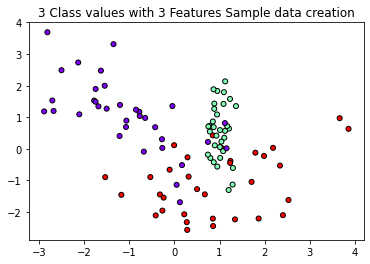

In [38]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 3 Features Sample data creation')

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 데이터 생성.
X_features, y_labels = make_classification(
    n_features=2, n_redundant=0, n_informative=2,
    n_classes=3, n_clusters_per_class=1, random_state=0
)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스의 값은 다른 색깔로 표시됨
plt.scatter(
    X_features[:, 0],
    X_features[:, 1],
    c=y_labels,
    s=25,
    marker='o',
    cmap='rainbow',
    edgecolor='k'
)

plt.show()